In [1]:
import math
import pandas_datareader.data as web
import pandas_datareader.data
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import datetime


In [2]:
df_bitcoinity = pd.read_csv('Bitcoinity_btc_daily.csv',index_col=0)
df_bitcoinity
df_kaggle = pd.read_csv('kaggle_export_dailyBtc.csv',index_col=0)
df_kaggle

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920
2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797,16642.341797,14472237479
2022-12-30,16641.330078,16643.427734,16408.474609,16602.585938,16602.585938,15929162910


In [3]:
currentDay = datetime.now().day
currentMonth = datetime.now().month
currentYear = datetime.now().year
# print(currentDay,currentMonth,currentYear)
yf.pdr_override()
y_symbols = ['BTC-USD']
startdate=datetime(2014,1,1)
enddate=datetime(currentYear,currentMonth,currentDay)
df = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)


[*********************100%***********************]  1 of 1 completed


In [4]:
# df.at['2015-02-17','Low']

In [5]:
# df.at['2017-02-18','Low']

In [6]:
# df.at['2019-02-19','Low']

In [7]:
# df.at['2019-10-25','Low']

In [8]:
df.at['2015-02-17','Low']=np.nan
df.at['2017-02-18','Low']=np.nan
df.at['2019-02-19','Low']=np.nan
df.at['2019-10-25','Low']=np.nan

In [9]:
# df.at['2015-02-17','Low']


In [10]:
# df.at['2017-02-18','Low']


In [11]:
# df.at['2019-02-19','Low']

In [12]:
# df.at['2019-10-25','Low']

In [13]:
# df[['low_bitcoinity', 'close_bitcoinity']] = df_kagle[['Close','Low']]
# df['Low_Kaggle'] = df_kaggle[['Low']].copy()
# df
# df['Low'] = df['Low'].fillna(df_kaggle['Low'])
df.at['2015-02-17','Low']=df_kaggle.at['2015-02-17','Low']
df.at['2017-02-18','Low']=df_kaggle.at['2017-02-18','Low']
df.at['2019-02-19','Low']=df_bitcoinity.at['2019-02-19','Low']
df.at['2019-10-25','Low']=df_bitcoinity.at['2019-10-25','Low']


In [14]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920
2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797,16642.341797,14472237479
2022-12-30,16641.330078,16643.427734,16408.474609,16602.585938,16602.585938,15929162910
2022-12-31,16603.673828,16628.986328,16517.519531,16547.496094,16547.496094,11239186456
2023-01-01,16551.529297,16626.906250,16522.958984,16613.601562,16613.601562,9238567936


In [15]:
# Checking the shape of our original data frame
df.shape

(3029, 6)

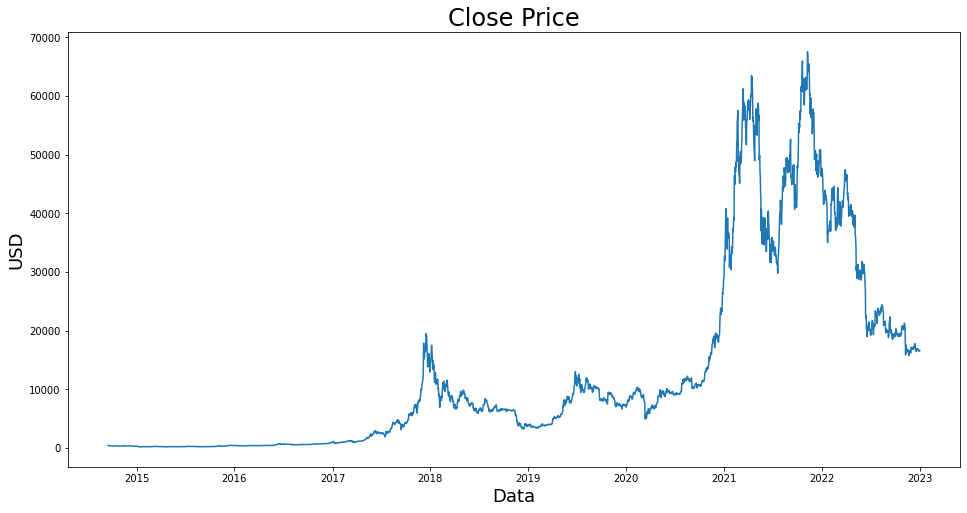

In [16]:
plt.figure(figsize=(16,8))
plt.title('Close Price', fontsize=24)
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('USD', fontsize=18)
plt.show()

In [17]:
#Creat a new dataframe with only Close Price
data = df.filter(['Close'])
#Convert the dataframe to numpy array
dataset = data.values
# Get the number of rows to train the model on. we need this number to create our train and test sets
# math.ceil will round up the number
training_data_len = math.ceil(len(dataset) * .8) # We are using %80 of the data for training
training_data_len

2424

In [18]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.24372746],
       [0.24290997],
       [0.24389093]])

In [19]:
# Creat the training dataset
train_data = scaled_data[0:training_data_len, :]
# Split the data into X_train and y_train data sets
print(train_data)
print("------------------------------")
X_train = []
y_train = []

for i in range(60, len(train_data)):
  print("------------------------------")
  print("----x_train--------------------------")
    
  X_train.append(train_data[i-60: i, 0])#days
  print(train_data[i-60: i, 0])
  print("---y_train---------------------------")
  y_train.append(train_data[i, 0])#btc price
  print(train_data[i, 0])


[[0.00414359]
 [0.00365546]
 [0.00321557]
 ...
 [0.78878827]
 [0.84948787]
 [0.83424063]]
------------------------------
------------------------------
----x_train--------------------------
[0.00414359 0.00365546 0.00321557 0.00342492 0.0032753  0.00332473
 0.0038239  0.00363714 0.00346454 0.00335845 0.00328567 0.00295417
 0.00292874 0.00309905 0.00304965 0.00292288 0.00269198 0.00223721
 0.00211322 0.00225521 0.00234585 0.00259445 0.0027738  0.0027224
 0.00273334 0.00297447 0.00315054 0.0033057  0.00321523 0.00303393
 0.00305177 0.0031658  0.00313766 0.00303822 0.00309209 0.00304287
 0.00267573 0.00267466 0.00251033 0.00262063 0.00259518 0.00266387
 0.00233701 0.00248116 0.00237752 0.00219096 0.00219308 0.00221774
 0.00226134 0.00239481 0.00254029 0.00243827 0.00248387 0.00274766
 0.00280197 0.00281341 0.00364242 0.00360048 0.00326041 0.00293862]
---y_train---------------------------
0.0031129686946921404
------------------------------
----x_train--------------------------
[0.00365546

[0.00077928 0.00077431 0.00083732 0.00084645 0.00083452 0.00081103
 0.00090577 0.00086934 0.00086004 0.00088214 0.00087834 0.00089966
 0.00089267 0.00092419 0.00100848 0.00096256 0.0009527  0.00097684
 0.00099183 0.00102312 0.00099727 0.0010596  0.00109641 0.00113101
 0.00125787 0.00137318 0.00123967 0.0012663  0.00135572 0.00130836
 0.00142338 0.00146008 0.00153662 0.00156669 0.00159073 0.00171668
 0.00187739 0.00201446 0.00222459 0.00201908 0.00218624 0.00271686
 0.0033435  0.00346438 0.00309029 0.00291394 0.00309219 0.00289759
 0.00299982 0.00235523 0.00197334 0.00237501 0.00235425 0.00229716
 0.00210811 0.00226519 0.00232963 0.00232215 0.0021969  0.00213565]
---y_train---------------------------
0.0022084407271971505
------------------------------
----x_train--------------------------
[0.00077431 0.00083732 0.00084645 0.00083452 0.00081103 0.00090577
 0.00086934 0.00086004 0.00088214 0.00087834 0.00089966 0.00089267
 0.00092419 0.00100848 0.00096256 0.0009527  0.00097684 0.00099183

[0.00532458 0.0053402  0.00580351 0.00585593 0.00588932 0.00604603
 0.00591336 0.00598827 0.00588417 0.00592632 0.00636047 0.00734071
 0.00780951 0.00753028 0.0076625  0.00872854 0.00847035 0.00857894
 0.00869104 0.00829698 0.00724971 0.00620301 0.00661645 0.00722964
 0.00722702 0.00669643 0.00708089 0.00695811 0.00685259 0.00734891
 0.00739282 0.00779951 0.00713118 0.00750213 0.0073087  0.00740818
 0.00686256 0.0072478  0.00701686 0.00699311 0.00696787 0.00721854
 0.00706891 0.00712248 0.00719931 0.00716239 0.00743976 0.00734549
 0.0073419  0.00723536 0.00722538 0.0070118  0.00708506 0.00717007
 0.00706341 0.00702908 0.00706719 0.00707733 0.00710637 0.0070775 ]
---y_train---------------------------
0.006626895413110592
------------------------------
----x_train--------------------------
[0.0053402  0.00580351 0.00585593 0.00588932 0.00604603 0.00591336
 0.00598827 0.00588417 0.00592632 0.00636047 0.00734071 0.00780951
 0.00753028 0.0076625  0.00872854 0.00847035 0.00857894 0.00869104


------------------------------
----x_train--------------------------
[0.01477364 0.01433084 0.01464781 0.01486698 0.01486698 0.0154981
 0.01592117 0.01627701 0.0159826  0.01616023 0.01624496 0.01551353
 0.01442225 0.01499341 0.0139284  0.01480555 0.01548148 0.01563788
 0.01575778 0.01590039 0.01498332 0.0136837  0.01180784 0.01274155
 0.01300109 0.01398508 0.01292556 0.01276901 0.0112692  0.01179242
 0.01170258 0.01287555 0.01289603 0.01278948 0.01258856 0.01326167
 0.01339092 0.01371249 0.0143304  0.01417369 0.014048   0.0149072
 0.01482143 0.01480733 0.01498421 0.01497323 0.01523856 0.0151697
 0.01470835 0.01468253 0.01475643 0.01491105 0.01507384 0.01533739
 0.01531691 0.01559574 0.01549142 0.01563477 0.0152712  0.0159084 ]
---y_train---------------------------
0.01613603746531761
------------------------------
----x_train--------------------------
[0.01433084 0.01464781 0.01486698 0.01486698 0.0154981  0.01592117
 0.01627701 0.0159826  0.01616023 0.01624496 0.01551353 0.01442225
 0

0.12797922720318183
------------------------------
----x_train--------------------------
[0.14582405 0.15021796 0.14297595 0.1407747  0.15119142 0.15651723
 0.15165441 0.15986201 0.16187125 0.16785593 0.16819574 0.16909649
 0.15732301 0.14523894 0.13677224 0.13591957 0.12892212 0.13949703
 0.13395441 0.13380201 0.12007508 0.12053585 0.12109216 0.11483786
 0.11939055 0.1254297  0.12962653 0.12986115 0.12688127 0.12912423
 0.12598572 0.12342832 0.11917865 0.11359374 0.11539582 0.10369089
 0.09960742 0.10083922 0.09892051 0.10247555 0.10800036 0.09906311
 0.09843438 0.09583527 0.09991266 0.10158104 0.09782982 0.09877998
 0.10076191 0.11442785 0.11452742 0.11586712 0.12095506 0.11694192
 0.11461839 0.11849633 0.12043864 0.12862281 0.12936106 0.12797923]
---y_train---------------------------
0.12988488607461388
------------------------------
----x_train--------------------------
[0.15021796 0.14297595 0.1407747  0.15119142 0.15651723 0.15165441
 0.15986201 0.16187125 0.16785593 0.16819574 0

------------------------------
----x_train--------------------------
[0.04894011 0.05098971 0.04933397 0.04817549 0.0491009  0.04652966
 0.04547321 0.04538829 0.04562686 0.04997515 0.05220393 0.05294428
 0.0587092  0.05517897 0.05692465 0.05669906 0.05788054 0.05397621
 0.05459659 0.05159217 0.0555852  0.05404919 0.05472502 0.05289605
 0.05439214 0.05587443 0.05429155 0.05460282 0.05441699 0.05785136
 0.05708886 0.05717195 0.05723796 0.05194966 0.05207492 0.05168814
 0.05008034 0.05235222 0.05123368 0.05159474 0.05194431 0.05163677
 0.05268634 0.05079352 0.05042282 0.0508464  0.05055772 0.05079132
 0.05077501 0.05081499 0.05054054 0.04885606 0.04852464 0.0490895
 0.04866823 0.04911567 0.04960708 0.04876054 0.04868843 0.04879532]
---y_train---------------------------
0.04801492859948302
------------------------------
----x_train--------------------------
[0.05098971 0.04933397 0.04817549 0.0491009  0.04652966 0.04547321
 0.04538829 0.04562686 0.04997515 0.05220393 0.05294428 0.0587092
 

------------------------------
----x_train--------------------------
[0.13387228 0.13478518 0.13572916 0.13440307 0.13703345 0.13599344
 0.13626578 0.134881   0.12801515 0.12814427 0.13173455 0.12731633
 0.12817514 0.12806534 0.12657892 0.12337211 0.12424419 0.12464804
 0.12066088 0.11913035 0.11647594 0.11076997 0.10563302 0.10713504
 0.10194308 0.10340054 0.10447249 0.10912153 0.10810418 0.11252833
 0.10968492 0.10752822 0.1060101  0.10598275 0.10497204 0.10788458
 0.10934906 0.10948619 0.1096065  0.10718108 0.10535912 0.10445849
 0.10483996 0.10523395 0.10308209 0.10349207 0.10023008 0.09589753
 0.10533958 0.10424209 0.1044791  0.10406868 0.10882363 0.10650929
 0.10601817 0.10531514 0.10477812 0.10553673 0.10595077 0.10750389]
---y_train---------------------------
0.10557985934336571
------------------------------
----x_train--------------------------
[0.13478518 0.13572916 0.13440307 0.13703345 0.13599344 0.13626578
 0.134881   0.12801515 0.12814427 0.13173455 0.12731633 0.12817514

0.13366797441046097
------------------------------
----x_train--------------------------
[0.13212386 0.13361989 0.13401625 0.12779979 0.12952955 0.12846288
 0.13359675 0.13871234 0.13742686 0.14130422 0.13775236 0.148232
 0.13877248 0.1406558  0.14279145 0.14078661 0.14061071 0.1421714
 0.14235892 0.14271819 0.14382216 0.13568558 0.13804595 0.13796335
 0.13665023 0.13759867 0.13889447 0.13803721 0.137022   0.13518457
 0.13584228 0.13541623 0.14053708 0.14025425 0.13556433 0.13484022
 0.13332816 0.13158414 0.13304123 0.13374272 0.1329583  0.13429876
 0.1327419  0.1322061  0.13287661 0.13200783 0.13648235 0.13465419
 0.13726673 0.13503542 0.13504788 0.13447715 0.13501364 0.13452564
 0.1345197  0.13377214 0.13287274 0.13315714 0.13327062 0.13366797]
---y_train---------------------------
0.13334765469141385
------------------------------
----x_train--------------------------
[0.13361989 0.13401625 0.12779979 0.12952955 0.12846288 0.13359675
 0.13871234 0.13742686 0.14130422 0.13775236 0.14

In [20]:
len(X_train)

2364

In [21]:
# Convert the X_train and y_train to numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

In [22]:
X_train.shape

(2364, 60)

In [23]:
# Reshape the data because LSTM needs 3 dim
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # we make it like pros. it wanna say "np.reshape(X_train, (2083, 60, 1))"
X_train.shape

(2364, 60, 1)

In [24]:
# Create the testing dataset
# Create a new array containing scaled values from index 2083
test_data = scaled_data[training_data_len - 60 : , :]

#Create the data sets X_test and y_test
X_test = []
y_test = dataset[training_data_len : , :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60 : i, 0])


In [25]:
# Convert the data to a numpy array 
X_test = np.array(X_test)

In [26]:
# Reshape the test data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [27]:
# Build LSTM model
tf.random.set_seed(42)

model_1 = Sequential()
model_1.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # we made it like pros ;) , the simple form is "input_shape(60, 1)""
model_1.add(LSTM(50, return_sequences=False))
model_1.add(Dense(25))
model_1.add(Dense(1))

In [28]:
# Compile the model
model_1.compile(optimizer='adam', loss='mse')

In [29]:
# Train the model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model_1.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
2364/2364 [==============================] - 41s 17ms/step - loss: 0.0012
Epoch 2/10
2364/2364 [==============================] - 42s 18ms/step - loss: 6.8541e-04
Epoch 3/10
2364/2364 [==============================] - 44s 19ms/step - loss: 5.7419e-04
Epoch 4/10
2364/2364 [==============================] - 43s 18ms/step - loss: 2.9886e-04
Epoch 5/10
2364/2364 [==============================] - 42s 18ms/step - loss: 2.8858e-04
Epoch 6/10
2364/2364 [==============================] - 41s 17ms/step - loss: 3.6317e-04
Epoch 7/10
2364/2364 [==============================] - 43s 18ms/step - loss: 2.6768e-04
Epoch 8/10
2364/2364 [==============================] - 45s 19ms/step - loss: 2.7662e-04
Epoch 9/10
2364/2364 [==============================] - 45s 19ms/step - loss: 2.1397e-04
Epoch 10/10
2364/2364 [==============================] - 46s 19ms/step - loss: 2.4644e-04


In [30]:
# Get the model_1 predicted price values 
predictions_1 = model_1.predict(X_test)
predictions_1 = scaler.inverse_transform(predictions_1)
len(predictions_1)

19/19 [==============================] - 1s 15ms/step


605

In [31]:
# Get the root mean squared error (RMSE) for model_1
rmse = np.sqrt(np.mean(predictions_1 - y_test)**2)
rmse

691.2135201446281

Text(0.5, 0, 'epochs')

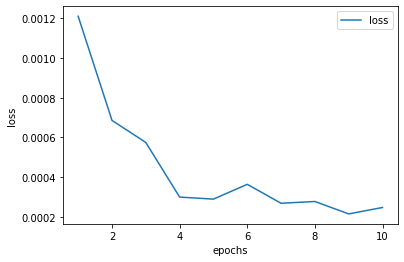

In [32]:
# Let's plot the history of model_1 and see what's going on
historyForPlot = pd.DataFrame(history.history)
historyForPlot.index += 1 # we plus 1 to the number of indexing so our epochs Plot picture will be counting from 1 not 0.
historyForPlot.plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [33]:
# Train the model again with 6 epochs
# but first we need to create another model so we can compare them together

# building LSTM model_2
tf.random.set_seed(42)

model_2 = Sequential()
model_2.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # we made it like pros ;) | the simple form is "input_shape(60, 1)
model_2.add(LSTM(50, return_sequences=False))
model_2.add(Dense(25))
model_2.add(Dense(1))

# Compile model_2
model_2.compile(optimizer='Adam', loss='mse')

# Fit model_2
history_2 = model_2.fit(X_train, y_train, batch_size=1, epochs=6)

Epoch 1/6
2364/2364 [==============================] - 48s 19ms/step - loss: 0.0012
Epoch 2/6
2364/2364 [==============================] - 43s 18ms/step - loss: 6.8662e-04
Epoch 3/6
2364/2364 [==============================] - 46s 20ms/step - loss: 6.0884e-04
Epoch 4/6
2364/2364 [==============================] - 45s 19ms/step - loss: 3.1953e-04
Epoch 5/6
2364/2364 [==============================] - 47s 20ms/step - loss: 2.8612e-04
Epoch 6/6
2364/2364 [==============================] - 44s 19ms/step - loss: 3.7479e-04


In [34]:
# Get the model_2 predicted price values 
predictions_2 = model_2.predict(X_test)
predictions_2 = scaler.inverse_transform(predictions_2)
len(predictions_2)

19/19 [==============================] - 1s 13ms/step


605

In [35]:
# Get the root mean squared error (RMSE) for model_2
rmse_2 = np.sqrt(np.mean(predictions_2 - y_test)**2)
rmse_2

307.1930526859504

C:\Users\Hp\AppData\Local\Temp/ipykernel_8428/1148230551.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_1['Predictions'] = predictions_1
C:\Users\Hp\AppData\Local\Temp/ipykernel_8428/1148230551.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_2['Predictions'] = predictions_2


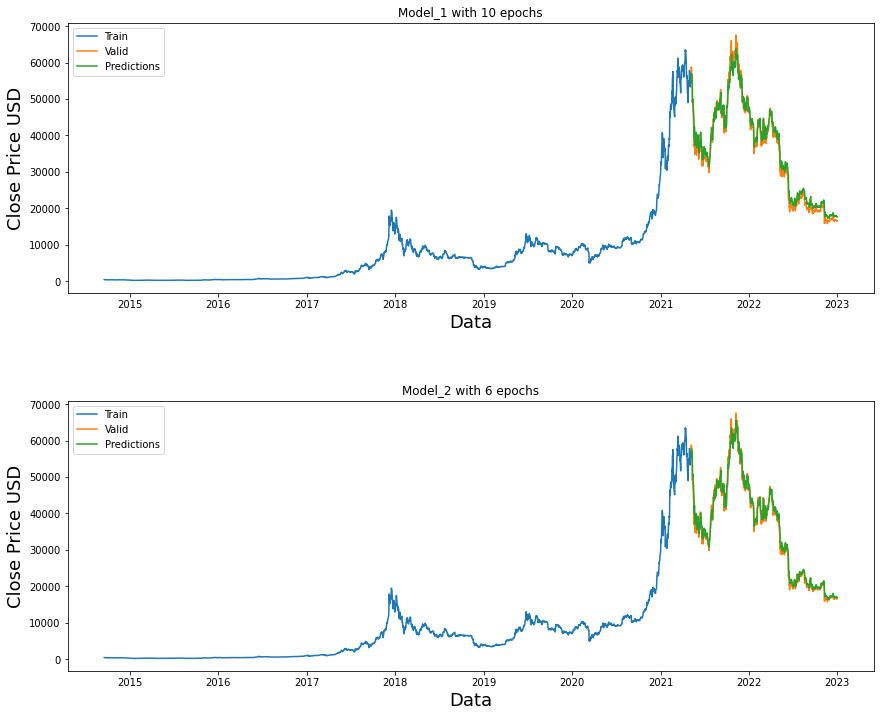

In [36]:
# Plot the data
train = data[:training_data_len]

#data for model_1
valid_1 = data[training_data_len:]
valid_1['Predictions'] = predictions_1

# data for model_2
valid_2 = data[training_data_len:]
valid_2['Predictions'] = predictions_2

# Visualized the data 
#model_1
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.title('Model_1 with 10 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_1[['Close', 'Predictions']])

plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')

#model_2
plt.subplot(2, 1, 2)
plt.title('Model_2 with 6 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_2[['Close', 'Predictions']])

plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [37]:
#Get the last 60 day closing price values and convert the datadrame to an array
last_60_days = data[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.fit_transform(last_60_days)
# create an empty list
new_X_test = []
# Append the past 60 days
new_X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
new_X_test = np.array(new_X_test)
# Reshape the data 
new_X_test = np.reshape(new_X_test, (new_X_test.shape[0], new_X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model_2.predict(new_X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)


1/1 [==============================] - 0s 24ms/step


In [38]:
print(pred_price)
print(data)

[[16648.564]]
                   Close
Date                    
2014-09-17    457.334015
2014-09-18    424.440002
2014-09-19    394.795990
2014-09-20    408.903992
2014-09-21    398.821014
...                  ...
2022-12-28  16552.572266
2022-12-29  16642.341797
2022-12-30  16602.585938
2022-12-31  16547.496094
2023-01-01  16613.601562

[3029 rows x 1 columns]


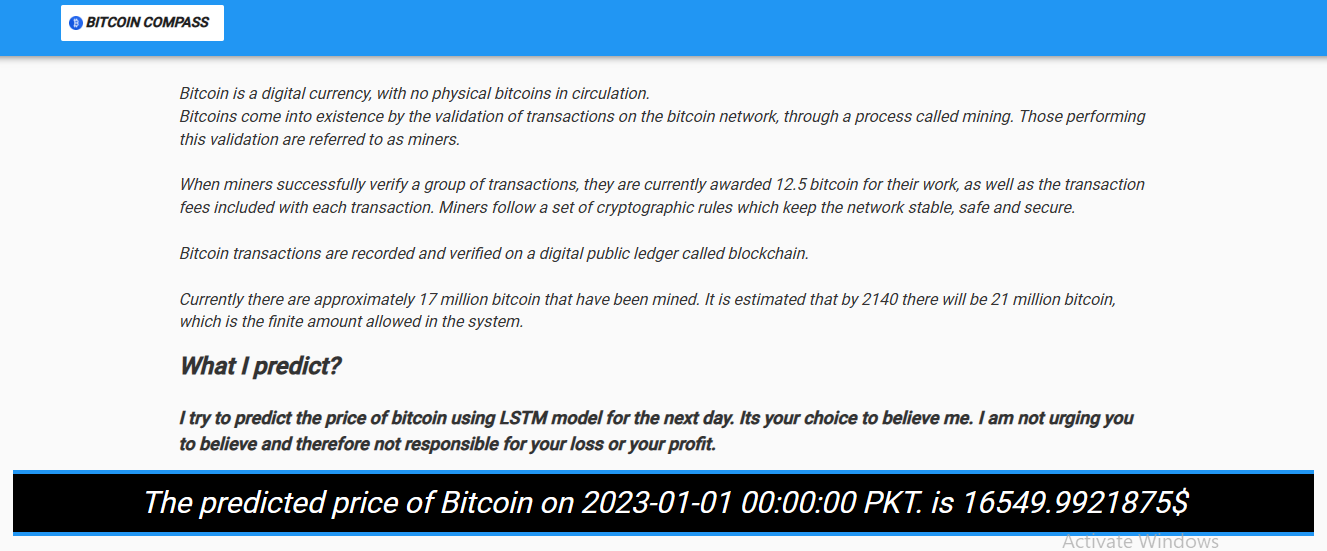

In [39]:
import anvil.server

anvil.server.connect("BH6YN6M42FGBIZYJP23FNZCC-UC7BZFOVIJORMLDV")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [40]:
@anvil.server.callable
def pred_price_function():
  return pred_price

Exception in thread Thread-11:
Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\anvil\server.py", line 405, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\anvil\server.py", line 395, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\anvil\_threaded_server.py", line 435, in do_call
    raise error_from_server
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\hp\appdata\local\programs\python\python39\lib\threading.py", line 954, in _bootstrap_inner
    self.run()
  File "c:\users\hp\appdata\local\programs\python\python39\lib\threading.py", line 892, in run
    self._

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER
